In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import seaborn as sns

In [204]:
flight_data=pd.read_csv("Flight_on_time_HIX.csv")

weather_data=pd.read_csv("weather.csv")

flight_data['Actual_Departure_Time'] = flight_data['Actual_Departure_Time'].apply(np.int64)

flight_data['Actual_Arrival_Time'] = flight_data['Actual_Arrival_Time'].apply(np.int64)

flight_data.dtypes

flight_data["FlightDate"]

weather_data=weather_data.query("airport=='Highland'")

s1="000"
s2="2"
s3="{}{}".format("000",s2)
print(s3)
s3[0:2]

def hour_extract(number):
  
  if(len(str(number))==1):
    s3="{}{}".format("000",number)
    return(s3[0:2])
  
  if(len(str(number))==2):
    s3="{}{}".format("00",number)
    return(s3[0:2])
  
  if(len(str(number))==3):
    s3="{}{}".format("0",number)
    return(s3[0:2])
  
  if(number==2400):
    return("00")

  if(len(str(number))==4):
    s3=str(number)
    return(s3[0:2])

def mins_extract(number):
  
  if(len(str(number))==1):
    s3="{}{}".format("000",number)
    return(s3[2:4])
  
  if(len(str(number))==2):
    s3="{}{}".format("00",number)
    return(s3[2:4])
  
  if(len(str(number))==3):
    s3="{}{}".format("0",number)
    return(s3[2:4])
  
  if(number==2400):
    return("00")

  if(len(str(number))==4):
    s3=str(number)
    return(s3[2:4])

def mins_extract(date,hours):
    return("{} {}{}".format(date,hours,":00"))

print(mins_extract("01-12-2019","23"))

from datetime import datetime

def date_format(date):
    ch = '/'
    if ch in date:
        return(datetime.strptime(date, '%m/%d/%Y').strftime('%d-%m-%Y'))
    else:
        return date

#flight_data['FlightDate'] = flight_data['FlightDate'].applymap(date_format)

flight_data['FlightDate'] = flight_data['FlightDate'].apply(date_format)

flight_data_departure=flight_data.query("Origin_Airport=='HIX'")

flight_data_arrival=flight_data.query("Destination_Airport=='HIX'")

flight_data_arrival.head()

flight_data_arrival['Actual_Arrival_Time_hr'] = flight_data_arrival['Actual_Arrival_Time'].apply(hour_extract)
flight_data_arrival['time'] = flight_data_arrival['FlightDate'] +" "+ flight_data_arrival['Actual_Arrival_Time_hr'] + ":00:00"
flight_data_arrival_merged = pd.merge(flight_data_arrival, weather_data, on='time', how='inner')

flight_data_departure['Actual_Departure_Time_hr'] = flight_data_departure['Actual_Departure_Time'].apply(hour_extract)
flight_data_departure['time'] = flight_data_departure['FlightDate'] +" "+ flight_data_departure['Actual_Departure_Time_hr'] + ":00:00"
flight_data_departure_merged = pd.merge(flight_data_departure, weather_data, on='time', how='left')

flight_data_departure_merged.to_excel("test_dep.xlsx")

flight_data_departure_merged.head()

data1=flight_data_departure_merged

data1.head(60)

df1 = data1[data1.Delay_Reason!= 'Weather']

df2 = data1[data1.Delay_Reason== 'Weather']
df1.head(5)

# z_scores = stats.zscore(df1)
# # calculate z-scores of `df`

# abs_z_scores = np.abs(z_scores)
# filtered_entries = (abs_z_scores < 3).all(axis=1)
# new_df = df1[filtered_entries]

# print(new_df)

# df1=df1.query("Airline_CA==1")
# df1.head(5)


0002
01-12-2019 23:00


<ipython-input-204-ef4470ff4d60>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_arrival['Actual_Arrival_Time_hr'] = flight_data_arrival['Actual_Arrival_Time'].apply(hour_extract)
<ipython-input-204-ef4470ff4d60>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_data_arrival['time'] = flight_data_arrival['FlightDate'] +" "+ flight_data_arrival['Actual_Arrival_Time_hr'] + ":00:00"
<ipython-input-204-ef4470ff4d60>:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Airline,Flight_Number,Plane_ID,FlightDate,Origin_Airport,Destination_Airport,Flight_Distance,Scheduled_Departure_Time,Actual_Departure_Time,Departure_Delay_Minutes,...,windSpeed,windGust,windBearing,cloudCover,uvIndex,visibility,ozone,precipType,precipAccumulation,time2
0,RO,4754,GHHWLL,01-12-2019,HIX,IZN,413,10,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XM,5612,GBISBC,01-12-2019,HIX,LKF,258,10,234,144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XM,5615,GBJODX,01-12-2019,HIX,MPM,475,10,144,94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XM,5661,GBESAF,01-12-2019,HIX,EZN,552,10,14,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NR,3741,GDJRDD,01-12-2019,HIX,FJS,836,10,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
df1=df1.drop(['FlightDate','Flight_Number','Plane_ID','FlightDate','Origin_Airport','Destination_Airport','Scheduled_Departure_Time',
              'Actual_Departure_Time','Departure_WheelsOff','Scheduled_Arrival_Time','Actual_Arrival_Time',
              'Arrival_Taxi','Arrival_WheelsOn','airport','time','summary','precipIntensity','precipProbability','temperature',
              'apparentTemperature','dewPoint','humidity','pressure','windSpeed','windGust','windBearing','cloudCover','uvIndex',
              'visibility','ozone','precipType','precipAccumulation','time2'],axis=1)
df1.head(10)

,Airline,Flight_Distance,Departure_Delay_Minutes,Departure_Taxi,Arrival_Delay_Minutes,Delay_Reason,Actual_Departure_Time_hr,Unnamed: 0
0,RO,413,0,15,0,Unknown,00,NaN
2,XM,258,144,26,146,Carrier,02,NaN
3,XM,475,94,11,89,Carrier,01,NaN
4,XM,552,4,24,13,Unknown,00,NaN
5,NR,836,0,14,0,Unknown,00,NaN
6,NR,1041,45,11,24,Carrier,00,NaN
7,NR,867,19,21,11,Unknown,00,NaN
8,SN,272,71,17,68,LateAircraft,01,NaN
9,SN,315,146,14,126,LateAircraft,02,NaN
10,ZH,109,89,10,76,LateAircraft,01,NaN


In [206]:
# df1=df1.drop(['Unnamed: 0'])

In [207]:
# df1 = pd.get_dummies(df1, columns = ['Airline'])
df1 = pd.get_dummies(df1, columns = ['Delay_Reason'])
print(df1)

      Airline  Flight_Distance  Departure_Delay_Minutes  Departure_Taxi  \
0          RO              413                        0              15   
2          XM              258                      144              26   
3          XM              475                       94              11   
4          XM              552                        4              24   
5          NR              836                        0              14   
...       ...              ...                      ...             ...   
32858      UG              867                        0              10   
32859      GB              801                        0              10   
32860      FH              557                       22              10   
32861      TR             1744                        0               9   
32862      NR             2072                        0              12   

       Arrival_Delay_Minutes Actual_Departure_Time_hr  Unnamed: 0  \
0                          0  

In [208]:
df1.columns

Index(['Airline', 'Flight_Distance', 'Departure_Delay_Minutes',
       'Departure_Taxi', 'Arrival_Delay_Minutes', 'Actual_Departure_Time_hr',
       'Unnamed: 0', 'Delay_Reason_Carrier', 'Delay_Reason_LateAircraft',
       'Delay_Reason_NAS', 'Delay_Reason_Security', 'Delay_Reason_Unknown'],
      dtype='object')

In [209]:
# df1=df1.query("Airline_CA==1")
# df1.head(5)

In [210]:
df1["Actual_Departure_Time_hr"] = pd.to_numeric(df1["Actual_Departure_Time_hr"])

q1 = df1["Departure_Delay_Minutes"].quantile(0.99)
df1=df1[df1["Departure_Delay_Minutes"] < q1]
q2 = df1["Departure_Taxi"].quantile(0.99)
df1=df1[df1["Departure_Taxi"] < q2]
q3 = df1["Arrival_Delay_Minutes"].quantile(0.99)
df1=df1[df1["Arrival_Delay_Minutes"] < q3]
q4 = df1["Flight_Distance"].quantile(0.99)
df1=df1[df1["Flight_Distance"] < q4]
q5 = df1["Actual_Departure_Time_hr"].quantile(0.99)
df1=df1[df1["Actual_Departure_Time_hr"] < q5]
df1.head(5)

# df1 = pd.get_dummies(df1, columns = ['Departure_Delay_Minutes'])
# print(df1)

# df1 = pd.get_dummies(df1, columns = ['Departure_Taxi'])
# print(df1)

# df1 = pd.get_dummies(df1, columns = ['Arrival_Delay_Minutes'])
# print(df1)

# ,['Departure_Delay_Minutes'],['Departure_Taxi'],
#                      ['Arrival_Delay_Minutes']

# from numpy import asarray
# from sklearn.preprocessing import OrdinalEncoder
# # define data
# datam = asarray([['RO'], ['XM'], ['NR'],['SN'],['ZH'],['CA'],['FH'],['GB'],
#                 ['LV'],['TJ'],['TO'],['TR'],['UG'],['VF'],['WC'],['YJ'],['ZH']])
# print(datam)
# # define ordinal encoding
# encoder = OrdinalEncoder()
# # transform data
# result = encoder.fit_transform(datam)
# print(result)


,Airline,Flight_Distance,Departure_Delay_Minutes,Departure_Taxi,Arrival_Delay_Minutes,Actual_Departure_Time_hr,Unnamed: 0,Delay_Reason_Carrier,Delay_Reason_LateAircraft,Delay_Reason_NAS,Delay_Reason_Security,Delay_Reason_Unknown
0,RO,413,0,15,0,0,NaN,0,0,0,0,1
3,XM,475,94,11,89,1,NaN,1,0,0,0,0
4,XM,552,4,24,13,0,NaN,0,0,0,0,1
5,NR,836,0,14,0,0,NaN,0,0,0,0,1
6,NR,1041,45,11,24,0,NaN,1,0,0,0,0


In [211]:
df1.fillna(0)

,Airline,Flight_Distance,Departure_Delay_Minutes,Departure_Taxi,Arrival_Delay_Minutes,Actual_Departure_Time_hr,Unnamed: 0,Delay_Reason_Carrier,Delay_Reason_LateAircraft,Delay_Reason_NAS,Delay_Reason_Security,Delay_Reason_Unknown
0,RO,413,0,15,0,0,0.0,0,0,0,0,1
3,XM,475,94,11,89,1,0.0,1,0,0,0,0
4,XM,552,4,24,13,0,0.0,0,0,0,0,1
5,NR,836,0,14,0,0,0.0,0,0,0,0,1
6,NR,1041,45,11,24,0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32855,CA,174,3,27,1,21,0.0,0,0,0,0,1
32856,NR,783,0,18,0,21,0.0,0,0,0,0,0
32857,ZH,299,0,16,0,21,0.0,0,0,0,0,0
32858,UG,867,0,10,0,21,0.0,0,0,0,0,0


In [212]:
df1 = pd.get_dummies(df1, columns = ['Airline'])
print(df1)  

       Flight_Distance  Departure_Delay_Minutes  Departure_Taxi  \
0                  413                        0              15   
3                  475                       94              11   
4                  552                        4              24   
5                  836                        0              14   
6                 1041                       45              11   
...                ...                      ...             ...   
32855              174                        3              27   
32856              783                        0              18   
32857              299                        0              16   
32858              867                        0              10   
32859              801                        0              10   

       Arrival_Delay_Minutes  Actual_Departure_Time_hr  Unnamed: 0  \
0                          0                         0         NaN   
3                         89                         1 

In [213]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(df1)
# df1 = pd.DataFrame(standardized_data, columns=df1.columns)
# df1.head(5)

In [214]:
#For departure delay of all airlines
Y=df1["Departure_Delay_Minutes"]
feature_cols=['Flight_Distance','Actual_Departure_Time_hr','Airline_CA','Airline_FH',
              'Airline_GB','Airline_LV','Airline_NR','Airline_RO','Airline_SN','Airline_TJ','Airline_TO', 
              'Airline_TR','Airline_UG','Airline_VF','Airline_WC','Airline_XM','Airline_YJ','Airline_ZH','Delay_Reason_Carrier',
              'Delay_Reason_LateAircraft','Delay_Reason_NAS', 'Delay_Reason_Security','Delay_Reason_Unknown']
X=df1[feature_cols]

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
import statsmodels.api as sm
#adds constant term beta0 to multiple linear regression
X= sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Departure_Delay_Minutes   R-squared:                       0.653
Model:                                 OLS   Adj. R-squared:                  0.652
Method:                      Least Squares   F-statistic:                     2582.
Date:                     Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                             19:51:38   Log-Likelihood:            -1.2123e+05
No. Observations:                    30269   AIC:                         2.425e+05
Df Residuals:                        30246   BIC:                         2.427e+05
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.6261      6.269     -0.897      0.370     -17.914       6.662
Flight_Distance               0.0016      0.000      7.150      0.000       0.001       0.002
Actual_Departure_Time_hr      0.1703      0.017     10.134      0.000       0.137       0.203
Airline_CA                   -0.0375      0.482     -0.078      0.938      -0.983       0.908
Airline_FH                   -1.5939      0.483     -3.300      0.001      -2.541      -0.647
Airline_GB                    0.2895      0.648      0.447      0.655      -0.980       1.559
Airline_LV                   -0.3574      1.075     -0.333      0.739      -2.464       1.749
Airline_NR                   -0.8835      0.479     -1.845      0.065      -1.822       0.055
Airline_RO                   -1.3205      0.578     -2.285      0.022      -2.453      -0.188
Airline_SN                   -0.7426      0.506     -1.469      0.142      -1.734       0.249
Airline_TJ                   -2.0492      1.010     -2.029      0.043      -4.029      -0.069
Airline_TO                    0.2777      0.626      0.443      0.657      -0.950       1.505
Airline_TR                   -1.3893      0.484     -2.871      0.004      -2.338      -0.441
Airline_UG                    2.4483      1.039      2.355      0.019       0.411       4.486
Airline_VF                   -2.4106      2.488     -0.969      0.333      -7.288       2.467
Airline_WC                    0.1695      0.586      0.289      0.772      -0.978       1.317
Airline_XM                    0.2194      0.567      0.387      0.699      -0.891       1.330
Airline_YJ                   -0.1290      0.999     -0.129      0.897      -2.088       1.830
Airline_ZH                    1.8830      0.538      3.499      0.000       0.828       2.938
Delay_Reason_Carrier         54.7790      6.659      8.227      0.000      41.728      67.830
Delay_Reason_LateAircraft    62.8437      6.656      9.442      0.000      49.798      75.890
Delay_Reason_NAS             14.5409      6.658      2.184      0.029       1.491      27.590
Delay_Reason_Security        25.2983      8.919      2.836      0.005       7.817      42.780
Delay_Reason_Unknown          4.8618      6.651      0.731      0.465      -8.175      17.899
==============================================================================
Omnibus:                    17422.562   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           318283.453
Skew:                           2.403   Prob(JB):                         0.00
Kurtosis:                      18.142   Cond. No.                     1.36e+19
==============================================================================

Notes:
[1] Stan

In [215]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
12,Airline_TR,inf
16,Airline_XM,inf
18,Airline_ZH,inf
3,Airline_CA,inf
4,Airline_FH,inf
5,Airline_GB,inf
6,Airline_LV,inf
7,Airline_NR,inf
8,Airline_RO,inf
9,Airline_SN,inf


In [216]:
#delay arrival for all airlines

Y=df1["Arrival_Delay_Minutes"]
feature_cols=['Flight_Distance','Departure_Delay_Minutes','Actual_Departure_Time_hr','Departure_Taxi','Airline_CA','Airline_FH',
              'Airline_GB','Airline_LV','Airline_NR','Airline_RO','Airline_SN','Airline_TJ','Airline_TO', 
              'Airline_TR','Airline_UG','Airline_VF','Airline_WC','Airline_XM','Airline_YJ','Airline_ZH','Delay_Reason_Carrier',
              'Delay_Reason_LateAircraft','Delay_Reason_NAS', 'Delay_Reason_Security']
X=df1[feature_cols]

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
import statsmodels.api as sm
#adds constant term beta0 to multiple linear regression
X= sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Arrival_Delay_Minutes   R-squared:                       0.919
Model:                               OLS   Adj. R-squared:                  0.919
Method:                    Least Squares   F-statistic:                 1.499e+04
Date:                   Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:51:39   Log-Likelihood:                -97887.
No. Observations:                  30269   AIC:                         1.958e+05
Df Residuals:                      30245   BIC:                         1.960e+05
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.0818      0.174    -29.135      0.000      -5.424      -4.740
Flight_Distance              -0.0014      0.000    -12.935      0.000      -0.002      -0.001
Departure_Delay_Minutes       0.8066      0.003    301.213      0.000       0.801       0.812
Actual_Departure_Time_hr     -0.0676      0.008     -8.675      0.000      -0.083      -0.052
Departure_Taxi                0.3114      0.004     75.857      0.000       0.303       0.319
Airline_CA                   -1.0629      0.128     -8.288      0.000      -1.314      -0.812
Airline_FH                    0.5204      0.129      4.045      0.000       0.268       0.773
Airline_GB                    0.3937      0.241      1.631      0.103      -0.079       0.867
Airline_LV                   -1.1512      0.462     -2.490      0.013      -2.057      -0.245
Airline_NR                    0.5527      0.126      4.374      0.000       0.305       0.800
Airline_RO                   -0.2650      0.195     -1.357      0.175      -0.648       0.118
Airline_SN                   -0.4449      0.146     -3.045      0.002      -0.731      -0.159
Airline_TJ                    0.2664      0.430      0.619      0.536      -0.577       1.109
Airline_TO                   -1.1824      0.225     -5.252      0.000      -1.624      -0.741
Airline_TR                    1.7461      0.131     13.333      0.000       1.489       2.003
Airline_UG                   -0.0062      0.452     -0.014      0.989      -0.892       0.879
Airline_VF                   -1.4402      1.136     -1.268      0.205      -3.667       0.787
Airline_WC                   -0.1232      0.200     -0.615      0.538      -0.516       0.269
Airline_XM                   -1.0212      0.189     -5.415      0.000      -1.391      -0.652
Airline_YJ                   -0.9536      0.425     -2.244      0.025      -1.786      -0.121
Airline_ZH                   -0.9104      0.172     -5.307      0.000      -1.247      -0.574
Delay_Reason_Carrier          4.6830      0.208     22.522      0.000       4.275       5.091
Delay_Reason_LateAircraft     5.9470      0.210     28.349      0.000       5.536       6.358
Delay_Reason_NAS             18.1326      0.171    106.072      0.000      17.798      18.468
Delay_Reason_Security         9.0567      2.749      3.294      0.001       3.668      14.445
==============================================================================
Omnibus:                    10690.367   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           333040.535
Skew:                           1.075   Prob(JB):                         0.00
Kurtosis:                      19.107   Cond. No.                     1.64e+19
=======================

In [217]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
12,Airline_TJ,inf
10,Airline_RO,inf
20,Airline_ZH,inf
19,Airline_YJ,inf
18,Airline_XM,inf
17,Airline_WC,inf
16,Airline_VF,inf
15,Airline_UG,inf
14,Airline_TR,inf
13,Airline_TO,inf


In [218]:
df1=df1.query("Airline_CA==1")
df1.head(5)

,Flight_Distance,Departure_Delay_Minutes,Departure_Taxi,Arrival_Delay_Minutes,Actual_Departure_Time_hr,Unnamed: 0,Delay_Reason_Carrier,Delay_Reason_LateAircraft,Delay_Reason_NAS,Delay_Reason_Security,...,Airline_SN,Airline_TJ,Airline_TO,Airline_TR,Airline_UG,Airline_VF,Airline_WC,Airline_XM,Airline_YJ,Airline_ZH
19,760,0,28,2,0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,632,0,25,0,0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22,403,2,23,0,0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58,528,0,17,0,5,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,723,0,23,0,6,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [219]:
# departure delay for CA airlines
Y=df1["Departure_Delay_Minutes"]
feature_cols=['Flight_Distance','Actual_Departure_Time_hr','Delay_Reason_Carrier', 'Delay_Reason_LateAircraft',
       'Delay_Reason_NAS', 'Delay_Reason_Security']
X=df1[feature_cols]

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
import statsmodels.api as sm
#adds constant term beta0 to multiple linear regression
X= sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Departure_Delay_Minutes   R-squared:                       0.667
Model:                                 OLS   Adj. R-squared:                  0.667
Method:                      Least Squares   F-statistic:                     1607.
Date:                     Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                             19:51:39   Log-Likelihood:                -19647.
No. Observations:                     4813   AIC:                         3.931e+04
Df Residuals:                         4806   BIC:                         3.935e+04
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -3.1588      0.788     -4.007      0.000      -4.704      -1.613
Flight_Distance               0.0041      0.001      5.981      0.000       0.003       0.005
Actual_Departure_Time_hr      0.2400      0.047      5.145      0.000       0.149       0.331
Delay_Reason_Carrier         57.6241      0.770     74.790      0.000      56.114      59.135
Delay_Reason_LateAircraft    55.2655      0.813     68.017      0.000      53.673      56.858
Delay_Reason_NAS              5.2762      0.952      5.543      0.000       3.410       7.142
Delay_Reason_Security        24.0762     10.152      2.372      0.018       4.174      43.979
==============================================================================
Omnibus:                     2315.565   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30217.069
Skew:                           1.963   Prob(JB):                         0.00
Kurtosis:                      14.630   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.52
2,Actual_Departure_Time_hr,1.02
4,Delay_Reason_LateAircraft,1.02
1,Flight_Distance,1.01
3,Delay_Reason_Carrier,1.01
5,Delay_Reason_NAS,1.01
6,Delay_Reason_Security,1.00


In [225]:
# arrival delay for CA airlines
Y=df1["Arrival_Delay_Minutes"]
feature_cols=['Flight_Distance','Departure_Delay_Minutes','Actual_Departure_Time_hr','Departure_Taxi','Airline_CA','Delay_Reason_Carrier', 'Delay_Reason_LateAircraft',
       'Delay_Reason_NAS', 'Delay_Reason_Security']
X=df1[feature_cols]

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
import statsmodels.api as sm
#adds constant term beta0 to multiple linear regression
X= sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Arrival_Delay_Minutes   R-squared:                       0.922
Model:                               OLS   Adj. R-squared:                  0.922
Method:                    Least Squares   F-statistic:                     7132.
Date:                   Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:52:46   Log-Likelihood:                -15756.
No. Observations:                   4813   AIC:                         3.153e+04
Df Residuals:                       4804   BIC:                         3.159e+04
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Flight_Distance              -0.0027      0.000     -8.687      0.000      -0.003      -0.002
Departure_Delay_Minutes       0.8094      0.006    124.805      0.000       0.797       0.822
Actual_Departure_Time_hr     -0.0348      0.021     -1.671      0.095      -0.076       0.006
Departure_Taxi                0.3313      0.010     33.000      0.000       0.312       0.351
Airline_CA                   -6.1999      0.417    -14.881      0.000      -7.017      -5.383
Delay_Reason_Carrier          3.5455      0.511      6.945      0.000       2.545       4.546
Delay_Reason_LateAircraft     4.5061      0.515      8.743      0.000       3.496       5.517
Delay_Reason_NAS             16.1604      0.491     32.898      0.000      15.197      17.123
Delay_Reason_Security        10.6913      4.528      2.361      0.018       1.814      19.569
==============================================================================
Omnibus:                      905.092   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13527.460
Skew:                           0.458   Prob(JB):                         0.00
Kurtosis:                      11.162   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,Features,VIF
4,Airline_CA,20.43
1,Departure_Delay_Minutes,3.06
20,Delay_Reason_Carrier,2.24
21,Delay_Reason_LateAircraft,2.07
22,Delay_Reason_NAS,1.36
3,Departure_Taxi,1.35
2,Actual_Departure_Time_hr,1.03
0,Flight_Distance,1.02
23,Delay_Reason_Security,1.00
5,Airline_FH,NaN


In [229]:
# arrival delay for CA airlines and only for unknown reason delays
df1=df1[df1.Delay_Reason_Unknown==1]
Y=df1["Arrival_Delay_Minutes"]
feature_cols=['Flight_Distance','Departure_Delay_Minutes','Actual_Departure_Time_hr','Departure_Taxi','Airline_CA','Delay_Reason_Carrier', 'Delay_Reason_LateAircraft',
       'Delay_Reason_NAS', 'Delay_Reason_Security']
X=df1[feature_cols]

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
import statsmodels.api as sm
#adds constant term beta0 to multiple linear regression
X= sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Arrival_Delay_Minutes   R-squared:                       0.369
Model:                               OLS   Adj. R-squared:                  0.369
Method:                    Least Squares   F-statistic:                     561.7
Date:                   Sat, 30 Jul 2022   Prob (F-statistic):               0.00
Time:                           19:57:33   Log-Likelihood:                -8842.5
No. Observations:                   3844   AIC:                         1.769e+04
Df Residuals:                       3839   BIC:                         1.773e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Flight_Distance              -0.0006      0.000     -4.801      0.000      -0.001      -0.000
Departure_Delay_Minutes       0.2425      0.007     37.248      0.000       0.230       0.255
Actual_Departure_Time_hr     -0.0047      0.009     -0.543      0.587      -0.022       0.012
Departure_Taxi                0.1502      0.005     32.503      0.000       0.141       0.159
Airline_CA                   -2.3263      0.176    -13.183      0.000      -2.672      -1.980
Delay_Reason_Carrier               0          0        nan        nan           0           0
Delay_Reason_LateAircraft          0          0        nan        nan           0           0
Delay_Reason_NAS                   0          0        nan        nan           0           0
Delay_Reason_Security              0          0        nan        nan           0           0
==============================================================================
Omnibus:                     1474.775   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7491.481
Skew:                           1.778   Prob(JB):                         0.00
Kurtosis:                       8.842   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [230]:
# arrival delay for CA airlines and only for unknown reason delays
df1=df1[df1.Delay_Reason_Unknown==1]
Y=df1["Departure_Delay_Minutes"]
feature_cols=['Flight_Distance','Actual_Departure_Time_hr','Departure_Taxi','Airline_CA','Delay_Reason_Carrier', 'Delay_Reason_LateAircraft',
       'Delay_Reason_NAS', 'Delay_Reason_Security']
X=df1[feature_cols]

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=1)
import statsmodels.api as sm
#adds constant term beta0 to multiple linear regression
X= sm.add_constant(X)
model=sm.OLS(Y,X).fit()
model.summary()

C:\Users\aksha\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Departure_Delay_Minutes   R-squared:                       0.023
Model:                                 OLS   Adj. R-squared:                  0.023
Method:                      Least Squares   F-statistic:                     30.58
Date:                     Sat, 30 Jul 2022   Prob (F-statistic):           1.58e-19
Time:                             19:58:30   Log-Likelihood:                -12332.
No. Observations:                     3844   AIC:                         2.467e+04
Df Residuals:                         3840   BIC:                         2.470e+04
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Flight_Distance               0.0024      0.000      7.632      0.000       0.002       0.003
Actual_Departure_Time_hr      0.0740      0.021      3.447      0.001       0.032       0.116
Departure_Taxi               -0.0649      0.011     -5.692      0.000      -0.087      -0.043
Airline_CA                    1.3850      0.437      3.171      0.002       0.529       2.241
Delay_Reason_Carrier               0          0        nan        nan           0           0
Delay_Reason_LateAircraft          0          0        nan        nan           0           0
Delay_Reason_NAS                   0          0        nan        nan           0           0
Delay_Reason_Security              0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2725.791   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32886.147
Skew:                           3.396   Prob(JB):                         0.00
Kurtosis:                      15.618   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [223]:
'Airline_TJ','Airline_FH','Airline_NR',

('Airline_TJ', 'Airline_FH', 'Airline_NR')

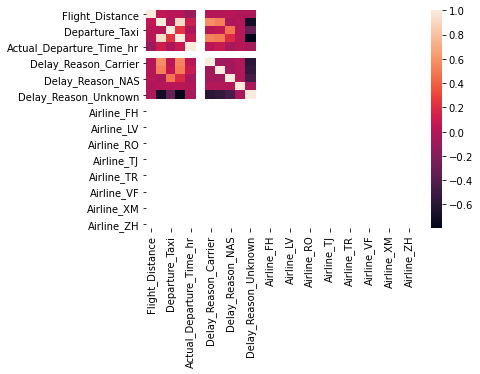

ValueError: data contains non-finite values (inf, NaN). You should drop these values or
use one of the methods for adjusting data for missing-values.

In [226]:
sns.heatmap(df1.corr())
plt.show()

np.asarray(df1)

from statsmodels.multivariate.pca import PCA
from locale import normalize
pc = PCA (df1, ncomp=3, standardize=True, demean=True,normalize=False)

df_comp =pc.loadings.T
df_comp

X_factors = pc.factors
X_factors

X_pca=sm.add_constant(X_factors)
model=sm.OLS(Y,X_pca).fit()
model.summary()

from statsmodels.multivariate.factor import Factor
model= Factor(df1).fit()
model.plot_scree()
plt.show()

In [ ]:
np.asarray(df1)

from statsmodels.multivariate.pca import PCA
from locale import normalize
pc = PCA (df1, ncomp=3, standardize=True, demean=True,normalize=False)

df_comp =pc.loadings.T
df_comp

X_factors = pc.factors
X_factors

X_pca=sm.add_constant(X_factors)
model=sm.OLS(Y,X_pca).fit()
model.summary()

from statsmodels.multivariate.factor import Factor
model= Factor(df1).fit()
model.plot_scree()
plt.show()

In [ ]:
'Airline_TJ''Airline_UG'